Car Damage Severity Dataset:
https://www.kaggle.com/datasets/prajwalbhamere/car-damage-severity-dataset

Car Body Type Classification Dataset:
https://www.kaggle.com/datasets/ademboukhris/cars-body-type-cropped

In [1]:
import tensorflow as tf
print(tf.__version__)

import keras as k
print(k.__version__)

2.12.0
2.12.0


### Loading and processing the data

### Damage Assessment

In [2]:
from keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Setup data generators with augmentation for training data
train_datagen_damage = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen_damage = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator_damage = train_datagen_damage.flow_from_directory(
    '/Users/sachin/My Files/Data Science/Playground/group-coursework-sa3n/data/damageCNN/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator_damage = test_datagen_damage.flow_from_directory(
    '/Users/sachin/My Files/Data Science/Playground/group-coursework-sa3n/data/damageCNN/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1383 images belonging to 3 classes.


Found 248 images belonging to 3 classes.


### Body Assessment

In [3]:
# Setup data generators for body type
train_datagen_body = ImageDataGenerator(rescale=1./255)
test_datagen_body = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator_body = train_datagen_body.flow_from_directory(
    '/Users/sachin/My Files/Data Science/Playground/group-coursework-sa3n/data/bodyCNN/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator_body = test_datagen_body.flow_from_directory(
    '/Users/sachin/My Files/Data Science/Playground/group-coursework-sa3n/data/body/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1334 images belonging to 7 classes.


Found 802 images belonging to 7 classes.


### Builing the CNN Models

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import  Dropout, Flatten, Dense


# Model for assessing damage 
num_classes = 3  # Adjust this based on the number of classes you have
damageModel = Sequential()
damageModel.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
damageModel.add(MaxPooling2D(pool_size=(2, 2)))

damageModel.add(Conv2D(64, (3, 3), activation='relu'))
damageModel.add(MaxPooling2D(pool_size=(2, 2)))

damageModel.add(Conv2D(128, (3, 3), activation='relu'))  # Additional convolutional layer
damageModel.add(MaxPooling2D(pool_size=(2, 2)))

damageModel.add(Flatten())
damageModel.add(Dense(128, activation='relu'))  # Increased number of neurons
bodyModel.add(Dropout(0.05))

# Final layer with 'softmax' for multi-class classification
damageModel.add(Dense(num_classes, activation='softmax'))

# Compile the damageModel with 'categorical_crossentropy' for multi-class
damageModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Model for assessing body 
num_classes = 7  # Adjust this based on the number of classes you have
bodyModel = Sequential()
bodyModel.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
bodyModel.add(MaxPooling2D(pool_size=(2, 2)))

bodyModel.add(Conv2D(64, (3, 3), activation='relu'))
bodyModel.add(MaxPooling2D(pool_size=(2, 2)))

bodyModel.add(Conv2D(128, (3, 3), activation='relu'))  # Additional convolutional layer
bodyModel.add(MaxPooling2D(pool_size=(2, 2)))

bodyModel.add(Flatten())
bodyModel.add(Dense(128, activation='relu'))  # Increased number of neurons
bodyModel.add(Dropout(0.05))

# Final layer with 'softmax' for multi-class classification
bodyModel.add(Dense(num_classes, activation='softmax'))

# Compile the damageModel with 'categorical_crossentropy' for multi-class
bodyModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### Training both the models

In [8]:
epochs=10

# training damage model

history = damageModel.fit(
    train_generator_damage,
    steps_per_epoch=train_generator_damage.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator_damage,
    validation_steps=test_generator_damage.samples // batch_size)

Epoch 1/10


2023-11-17 13:11:52.513326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


43/43 [==============================] - ETA: 0s - loss: 1.1669 - accuracy: 0.3538

2023-11-17 13:11:59.699771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


43/43 [==============================] - 8s 171ms/step - loss: 1.1669 - accuracy: 0.3538 - val_loss: 1.0911 - val_accuracy: 0.4330
Epoch 2/10
43/43 [==============================] - 7s 159ms/step - loss: 1.0914 - accuracy: 0.3908 - val_loss: 1.0684 - val_accuracy: 0.4955
Epoch 3/10
43/43 [==============================] - 7s 159ms/step - loss: 1.0664 - accuracy: 0.4219 - val_loss: 1.0066 - val_accuracy: 0.5000
Epoch 4/10
43/43 [==============================] - 7s 160ms/step - loss: 1.0469 - accuracy: 0.4471 - val_loss: 1.0092 - val_accuracy: 0.4777
Epoch 5/10
43/43 [==============================] - 7s 160ms/step - loss: 1.0228 - accuracy: 0.4767 - val_loss: 0.9706 - val_accuracy: 0.5580
Epoch 6/10
43/43 [==============================] - 7s 158ms/step - loss: 1.0294 - accuracy: 0.4626 - val_loss: 0.9489 - val_accuracy: 0.5312
Epoch 7/10
43/43 [==============================] - 7s 160ms/step - loss: 1.0053 - accuracy: 0.4930 - val_loss: 0.9230 - val_accuracy: 0.5536
Epoch 8/10
43/43 

In [9]:
epochs=10

# training body model
history = bodyModel.fit(
    train_generator_body,
    steps_per_epoch=train_generator_body.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator_body,
    validation_steps=test_generator_body.samples // batch_size)


Epoch 1/10


2023-11-17 13:13:02.770372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - ETA: 0s - loss: 1.9522 - accuracy: 0.2174

2023-11-17 13:13:09.559359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 12s 283ms/step - loss: 1.9522 - accuracy: 0.2174 - val_loss: 1.8111 - val_accuracy: 0.2512
Epoch 2/10
41/41 [==============================] - 11s 266ms/step - loss: 1.5123 - accuracy: 0.4409 - val_loss: 1.4224 - val_accuracy: 0.4825
Epoch 3/10
41/41 [==============================] - 11s 265ms/step - loss: 1.1216 - accuracy: 0.5906 - val_loss: 1.5129 - val_accuracy: 0.4387
Epoch 4/10
41/41 [==============================] - 11s 265ms/step - loss: 0.7484 - accuracy: 0.7312 - val_loss: 1.4520 - val_accuracy: 0.5337
Epoch 5/10
41/41 [==============================] - 11s 268ms/step - loss: 0.4296 - accuracy: 0.8379 - val_loss: 1.8206 - val_accuracy: 0.5350
Epoch 6/10
41/41 [==============================] - 11s 270ms/step - loss: 0.2046 - accuracy: 0.9263 - val_loss: 2.1663 - val_accuracy: 0.5525
Epoch 7/10
41/41 [==============================] - 11s 270ms/step - loss: 0.0939 - accuracy: 0.9708 - val_loss: 2.2327 - val_accuracy: 0.5500
Epoch 8/10

### Evaluating both model and testing each

In [14]:
# Evaluate the accuracy of the damage model on the test data
test_loss, test_accuracy = damageModel.evaluate(test_generator_damage)
print(f"Test Accuracy of Damage Model: {test_accuracy * 100:.2f}%")

# Evaluate the accuracy of the body model on the test data
test_loss, test_accuracy = bodyModel.evaluate(test_generator_body)
print(f"Test Accuracy of Damage Model: {test_accuracy * 100:.2f}%")

3/8 [==========>...................] - ETA: 0s - loss: 1.0498 - accuracy: 0.5312

2023-11-17 13:15:28.412892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 0s 43ms/step - loss: 0.9209 - accuracy: 0.5565
Test Accuracy of Damage Model: 55.65%


2023-11-17 13:15:28.976654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 5s 184ms/step - loss: 2.6059 - accuracy: 0.5698
Test Accuracy of Damage Model: 56.98%


1/1 [==============================] - 0s 52ms/step


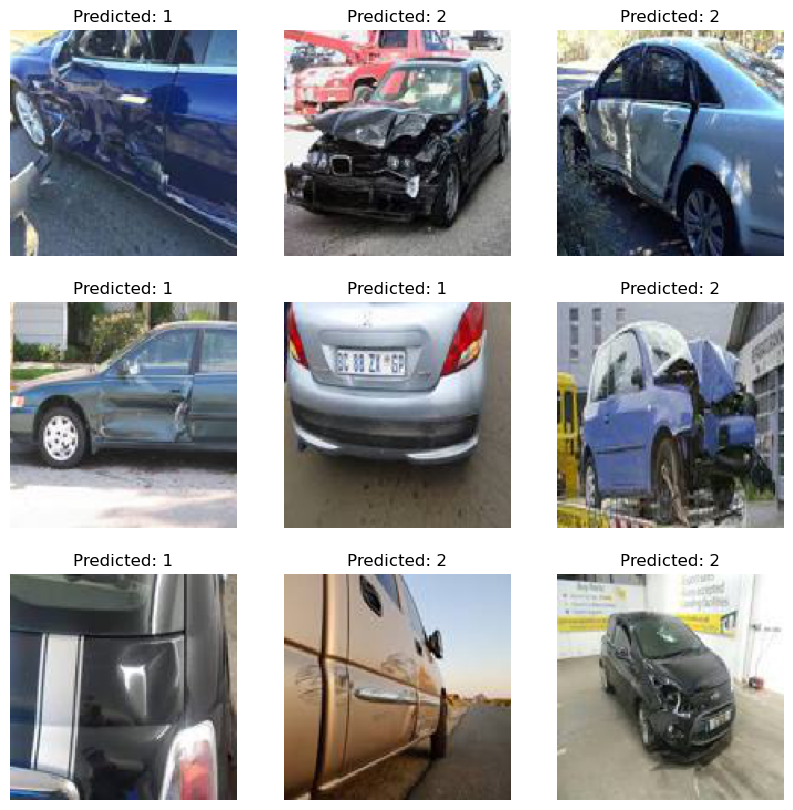

1/1 [==============================] - 0s 52ms/step


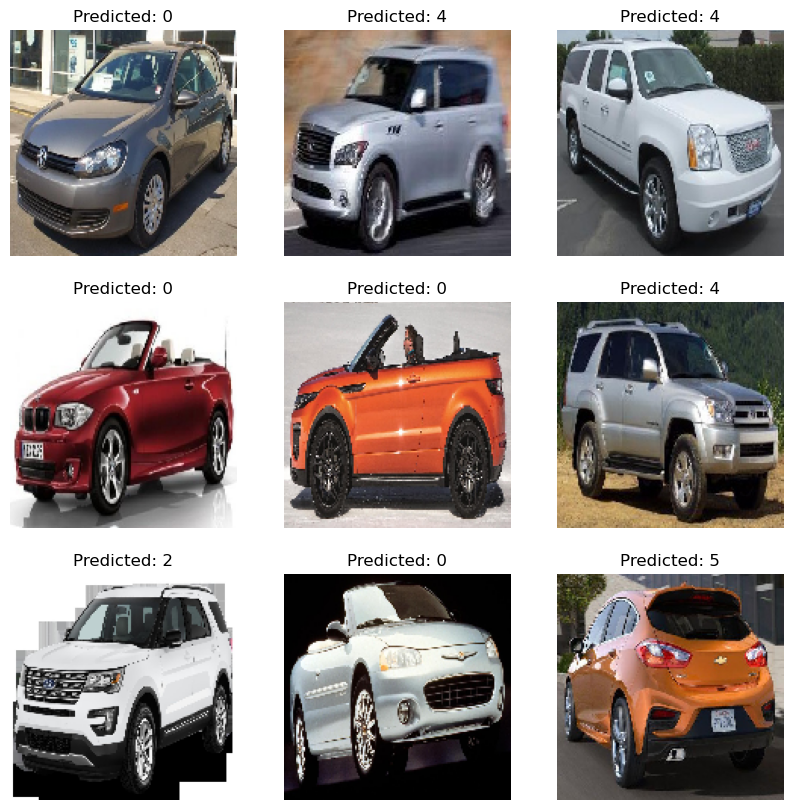

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# plotting testing results of damage model
# Get a batch of test data
test_images, test_labels = next(test_generator_damage)

# Make predictions
predictions = damageModel.predict(test_images)

# Plot the images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title('Predicted: {}'.format(np.argmax(predictions[i])))
    plt.axis('off')
plt.show()


# plotting testing results of body model
# Get a batch of test data
test_images, test_labels = next(test_generator_body)

# Make predictions
predictions = bodyModel.predict(test_images)

# Plot the images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title('Predicted: {}'.format(np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

## Confusion Matrix for damage model

1/1 [==============================] - 0s 56ms/step


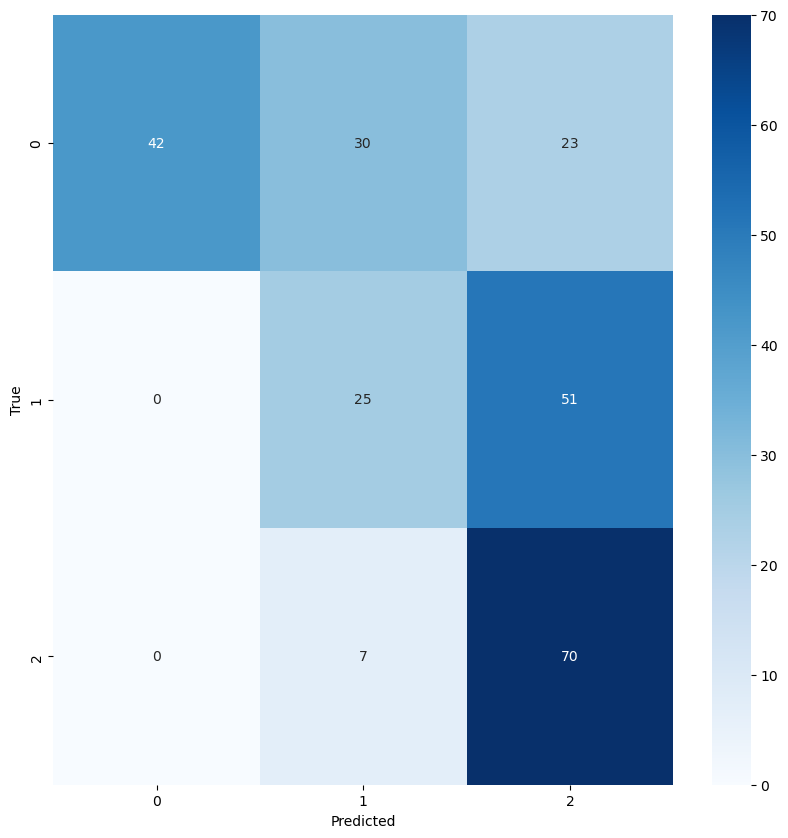

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize lists to hold true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over the generator to collect predictions and labels
for i in range(len(test_generator_damage)):
    X_batch, y_batch = next(test_generator_damage)
    true_labels.extend(np.argmax(y_batch, axis=1))  # Adjust this if your labels are not one-hot encoded
    preds = damageModel.predict(X_batch)
    predicted_labels.extend(np.argmax(preds, axis=1))

# Ensure the length of predicted_labels and true_labels are the same
assert len(predicted_labels) == len(true_labels), "Mismatch between true and predicted label counts"

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Confusion Matrix for Body model

1/1 [==============================] - 0s 49ms/step


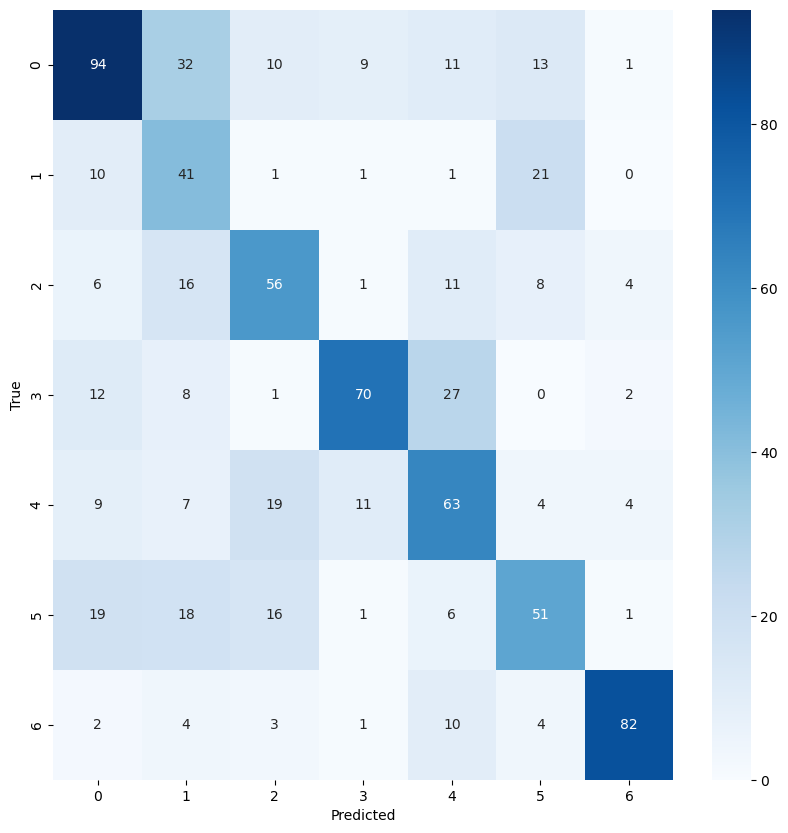

In [17]:
# Initialize lists to hold true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over the generator to collect predictions and labels
for i in range(len(test_generator_body)):
    X_batch, y_batch = next(test_generator_body)
    true_labels.extend(np.argmax(y_batch, axis=1))  # Adjust this if your labels are not one-hot encoded
    preds = bodyModel.predict(X_batch)
    predicted_labels.extend(np.argmax(preds, axis=1))

# Ensure the length of predicted_labels and true_labels are the same
assert len(predicted_labels) == len(true_labels), "Mismatch between true and predicted label counts"

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Findings

The accuracy of the models need to be improved if possible.

The damage model predicts values from 0 to 2, where 0 is lowest severity and 2 is highest severity.
The body model predicts values from 0 to 6, where,
1.  0 = Convertible
2.  1 = Coupe
3.  2 = Hatchback
4.  3 = Pick-Up
5.  4 = Sedan
6.  5 = SUV
7.  6 = VAN